In [9]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.plotting import plot_quantiles
from aeons.beta import *

In [4]:
from aeons.toy_samples import correlated_gaussian

mean = mean=(0, 0, 0)
cov = np.diag([1, 1, 1]) * 1e-4
bounds=([-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5])
samples = correlated_gaussian(nlive=500, mean=mean, cov=cov, bounds=bounds)

In [6]:
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]

In [18]:
iterations = make_iterations(endpoint_true, 50)
logXs = samples.logX().iloc[iterations]

logXfs, d_Gs = model.inferences(get_d_G_post, iterations)

 Iteration 14408 of 14408, d=2.9

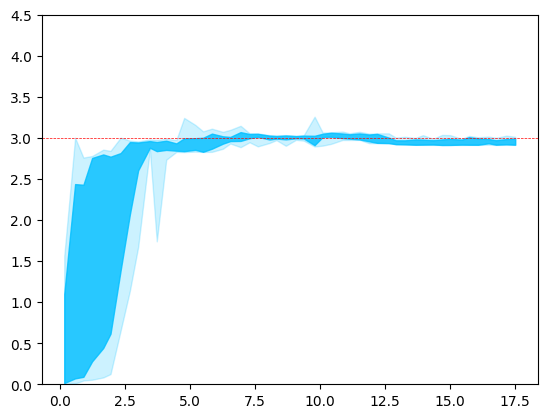

In [19]:
plot_quantiles(-logXs, d_Gs, 3, (0, 1.5))

In [2]:
name, samples = get_samples('gauss_8')
true_endpoint = endpoints[name]
logXf_true = samples.logX().iloc[true_endpoint]


iterations, *logXfs = read_from_txt(f'{data_dir}/logXfs/post/{name}.txt')
logXfs = np.array(logXfs)
logXs = samples.logX().iloc[iterations]

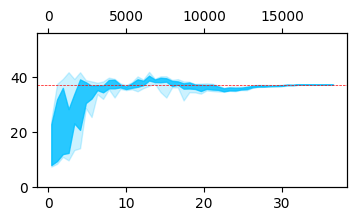

In [101]:
fig, ax = plt.subplots(figsize=(4, 2))
plot_quantiles(-logXs, -logXfs, -logXf_true, ylim=(0, 1.5), color='deepskyblue', ax=ax)
axt = ax.twiny()
axt.set_xlim(ax.get_xlim())
ticks = ax.get_xticks()[1:-1]
axt.set_xticks(ticks, [f'{t*500:.0f}' for t in ticks]);

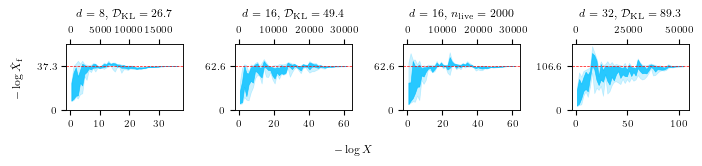

In [108]:
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.plotting import *
figsettings()

d = [8, 16, '16_2000', 32]
fig, axs = plt.subplots(1, 4, figsize=(7, 1.6))
axs = axs.flatten()
for i, nDims in enumerate(d):
    ax = axs[i]
    name, samples = get_samples(f'gauss_{nDims}')
    true_endpoint = endpoints[name]
    logXf_true = samples.logX().iloc[true_endpoint]
    iterations, *logXfs = read_from_txt(f'{data_dir}/logXfs/post/{name}.txt')
    logXfs = np.array(logXfs)
    logXs = samples.logX().iloc[iterations]
    plot_quantiles(-logXs, -logXfs, -logXf_true, ylim=(0, 1.5), color='deepskyblue', ax=axs[i])
    ax.set_title(rf'$d$ = {nDims}, $\mathcal{{D}}_\mathrm{{KL}} = {samples.D_KL():.1f}$', fontsize=8)
    ax.set_yticks([0, -logXf_true], [0, f"{-logXf_true:.1f}"])
    ax.margins(x=0.05)
    axt = ax.twiny()
    axt.set_xlim(ax.get_xlim())
    ticks = ax.get_xticks()[1:-1]
    axt.set_xticks(ticks, [f'{t*500:.0f}' for t in ticks])

axs[2].set_title(r"$d$ = 16, $n_\mathrm{live} = 2000$", fontsize=8)
fig.supxlabel('$-\\log X$', y=0.02, fontsize=8)
fig.supylabel('$-\\log \hat{X}_\mathrm{f}$', fontsize=8, x=0.01)
fig.tight_layout()